<a href="https://colab.research.google.com/github/johan-stph/thesis/blob/main/gan_working_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [ ]:
# Transform to tensor and normalize
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create dataloader
dataloader = DataLoader(mnist, batch_size=32, shuffle=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 103741391.41it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28766491.05it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25340825.52it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13804730.99it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Define generator network
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),

            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),

            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),

            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)


# Define discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)


In [ ]:
# function to train the discriminator
def train_discriminator(optimizer, real_data, fake_data):
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    error_real = loss(prediction_real, real_data_target(real_data.size(0)))
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    error_fake = loss(prediction_fake, fake_data_target(real_data.size(0)))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error
    return error_real + error_fake, prediction_real, prediction_fake

# function to train the generator
def train_generator(optimizer, fake_data):
    optimizer.zero_grad()
    
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    
    # Calculate error and backpropagate
    error = loss(prediction, real_data_target(prediction.size(0)))
    error.backward()
    
    # Update weights with gradients
    optimizer.step()
    
    # Return error
    return error


In [ ]:
def noise(size):
    return torch.randn(size, 100).to(device)

def real_data_target(size):
    return torch.ones(size, 1).to(device)

def fake_data_target(size):
    return torch.zeros(size, 1).to(device)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

discriminator = Discriminator().to(device)
generator = Generator(100).to(device)

d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)

loss = nn.BCELoss()


Epoch 1/100 => D_error: 1.1093790531158447, G_error: 3.2915985584259033
Epoch 2/100 => D_error: 0.5158112049102783, G_error: 1.8958380222320557
Epoch 3/100 => D_error: 0.9889456033706665, G_error: 1.458106517791748
Epoch 4/100 => D_error: 1.0513919591903687, G_error: 1.4740376472473145
Epoch 5/100 => D_error: 1.3966269493103027, G_error: 1.1247426271438599


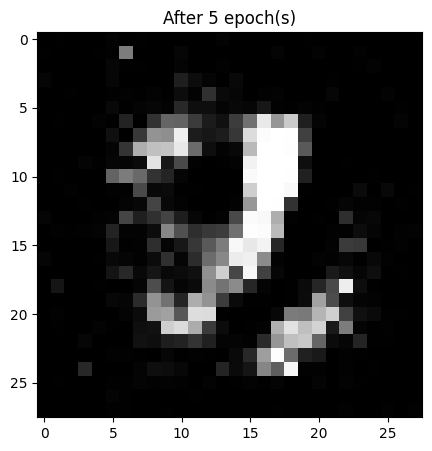

Epoch 6/100 => D_error: 0.916246771812439, G_error: 1.1683155298233032
Epoch 7/100 => D_error: 1.142021656036377, G_error: 1.3147387504577637
Epoch 8/100 => D_error: 0.7632659673690796, G_error: 1.448042631149292
Epoch 9/100 => D_error: 0.8848048448562622, G_error: 1.169856071472168
Epoch 10/100 => D_error: 1.0517817735671997, G_error: 1.2116189002990723


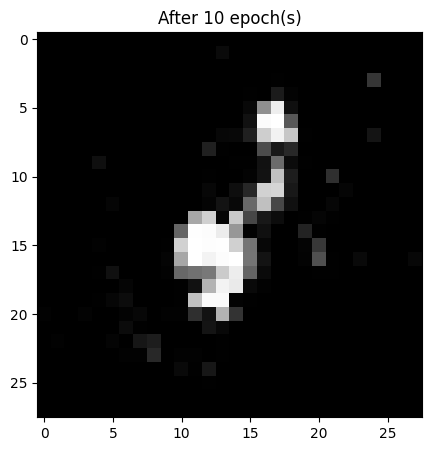

Epoch 11/100 => D_error: 1.2702462673187256, G_error: 1.0653289556503296
Epoch 12/100 => D_error: 1.1620171070098877, G_error: 1.3986738920211792
Epoch 13/100 => D_error: 1.0212898254394531, G_error: 1.2723851203918457
Epoch 14/100 => D_error: 1.0767309665679932, G_error: 1.1452840566635132
Epoch 15/100 => D_error: 1.2085602283477783, G_error: 0.9753680229187012


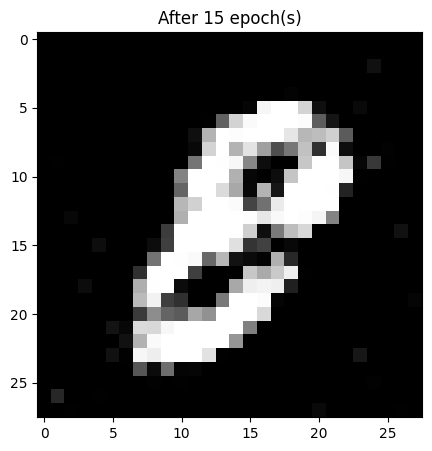

Epoch 16/100 => D_error: 1.190700888633728, G_error: 0.8593879342079163
Epoch 17/100 => D_error: 1.2144904136657715, G_error: 0.8689097166061401
Epoch 18/100 => D_error: 1.1195764541625977, G_error: 0.9529528021812439
Epoch 19/100 => D_error: 1.0336077213287354, G_error: 1.012826681137085
Epoch 20/100 => D_error: 1.1671758890151978, G_error: 0.8729398846626282


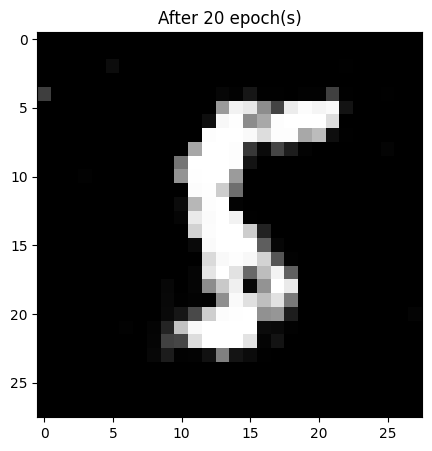

Epoch 21/100 => D_error: 1.1386644840240479, G_error: 0.8176212310791016
Epoch 22/100 => D_error: 1.454289197921753, G_error: 0.8706306219100952
Epoch 23/100 => D_error: 1.162946105003357, G_error: 0.9577695727348328
Epoch 24/100 => D_error: 1.4059736728668213, G_error: 0.9600160717964172
Epoch 25/100 => D_error: 1.3771145343780518, G_error: 0.7392559051513672


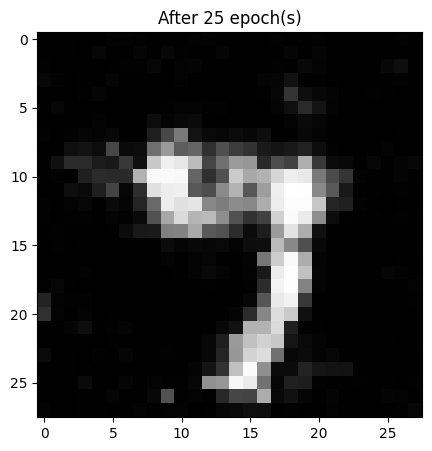

Epoch 26/100 => D_error: 1.3206901550292969, G_error: 0.9978295564651489
Epoch 27/100 => D_error: 1.214181900024414, G_error: 0.8024340867996216
Epoch 28/100 => D_error: 1.270801305770874, G_error: 0.8262450695037842
Epoch 29/100 => D_error: 1.144973874092102, G_error: 0.9544063210487366
Epoch 30/100 => D_error: 1.2241392135620117, G_error: 0.9133710861206055


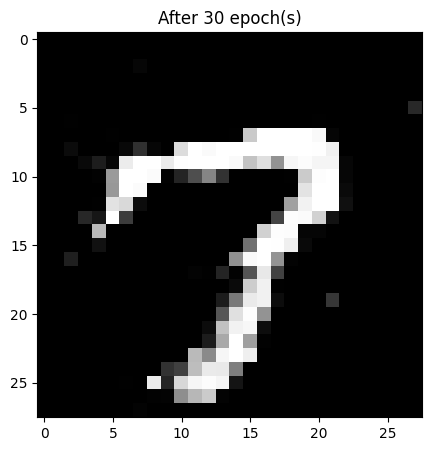

Epoch 31/100 => D_error: 1.1558759212493896, G_error: 0.8985930681228638
Epoch 32/100 => D_error: 1.1328673362731934, G_error: 0.8559674024581909
Epoch 33/100 => D_error: 1.3389419317245483, G_error: 0.924208402633667
Epoch 34/100 => D_error: 1.380704402923584, G_error: 1.0374269485473633
Epoch 35/100 => D_error: 1.4900703430175781, G_error: 0.8654294610023499


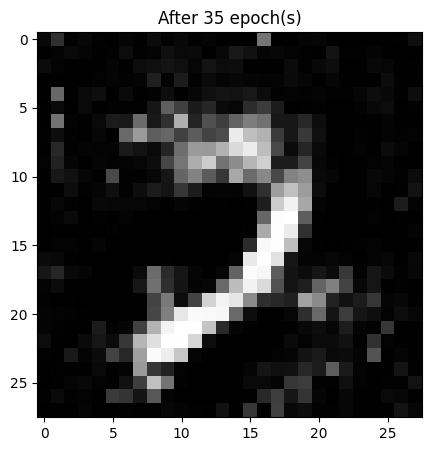

Epoch 36/100 => D_error: 1.3579353094100952, G_error: 0.9500480890274048
Epoch 37/100 => D_error: 1.2391911745071411, G_error: 0.8989943265914917
Epoch 38/100 => D_error: 1.2117429971694946, G_error: 0.954973578453064
Epoch 39/100 => D_error: 1.2794420719146729, G_error: 0.8872964382171631
Epoch 40/100 => D_error: 1.402465581893921, G_error: 0.9639904499053955


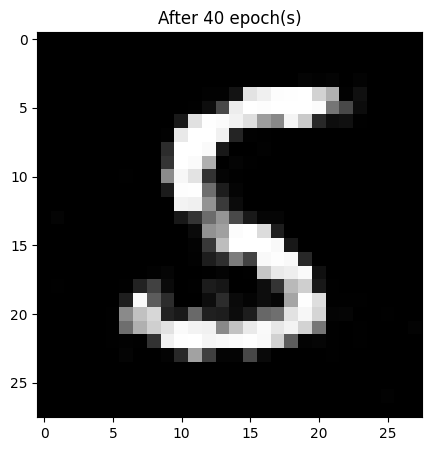

Epoch 41/100 => D_error: 1.312676191329956, G_error: 0.8258644938468933
Epoch 42/100 => D_error: 1.2364509105682373, G_error: 0.9163522124290466
Epoch 43/100 => D_error: 1.2252795696258545, G_error: 0.9004058241844177
Epoch 44/100 => D_error: 1.3409795761108398, G_error: 0.9024879336357117
Epoch 45/100 => D_error: 1.3339729309082031, G_error: 0.8242073655128479


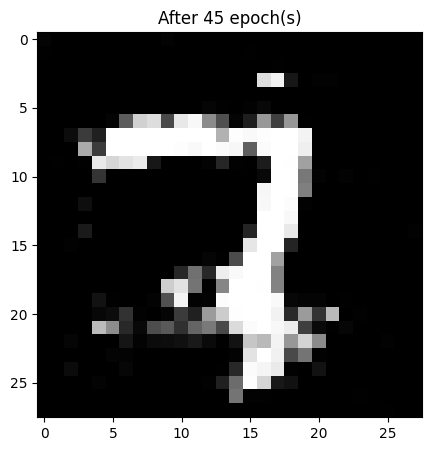

Epoch 46/100 => D_error: 1.3232405185699463, G_error: 0.8859574794769287
Epoch 47/100 => D_error: 1.3155725002288818, G_error: 0.791067361831665
Epoch 48/100 => D_error: 1.293608546257019, G_error: 0.8794111609458923
Epoch 49/100 => D_error: 1.1789464950561523, G_error: 0.9002320766448975
Epoch 50/100 => D_error: 1.2546613216400146, G_error: 0.9387522339820862


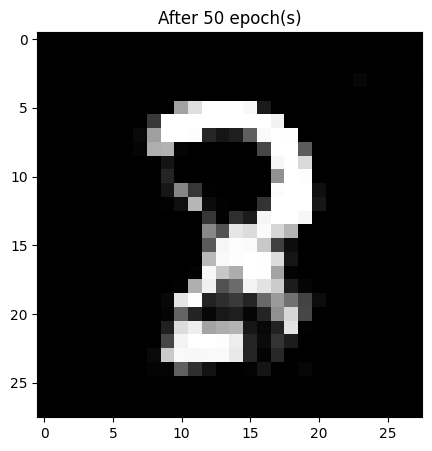

Epoch 51/100 => D_error: 1.2046412229537964, G_error: 1.0027025938034058
Epoch 52/100 => D_error: 1.278741478919983, G_error: 0.9015947580337524
Epoch 53/100 => D_error: 1.2491728067398071, G_error: 0.8222889304161072
Epoch 54/100 => D_error: 1.3114851713180542, G_error: 0.7055515050888062
Epoch 55/100 => D_error: 1.5000532865524292, G_error: 0.888401985168457


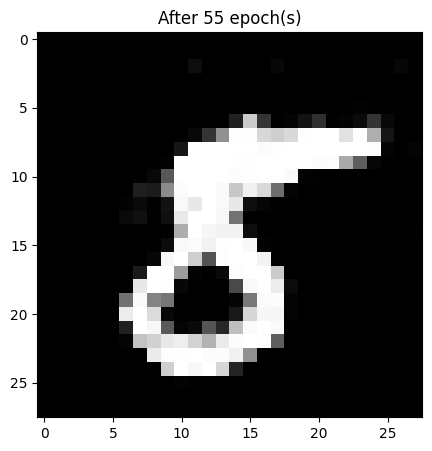

Epoch 56/100 => D_error: 1.3444268703460693, G_error: 0.7829827070236206
Epoch 57/100 => D_error: 1.3988845348358154, G_error: 0.924709141254425
Epoch 58/100 => D_error: 1.3455071449279785, G_error: 0.7012465000152588
Epoch 59/100 => D_error: 1.133509874343872, G_error: 0.8985463380813599
Epoch 60/100 => D_error: 1.4151643514633179, G_error: 0.7978789806365967


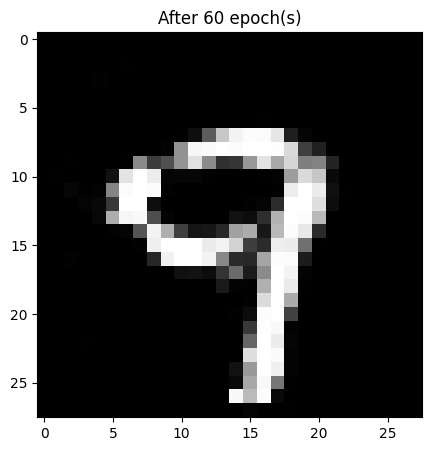

Epoch 61/100 => D_error: 1.3034639358520508, G_error: 0.8566513061523438
Epoch 62/100 => D_error: 1.3590079545974731, G_error: 0.8972384333610535
Epoch 63/100 => D_error: 1.3271387815475464, G_error: 0.9182875752449036
Epoch 64/100 => D_error: 1.3668406009674072, G_error: 0.8125685453414917
Epoch 65/100 => D_error: 1.4568191766738892, G_error: 0.7233103513717651


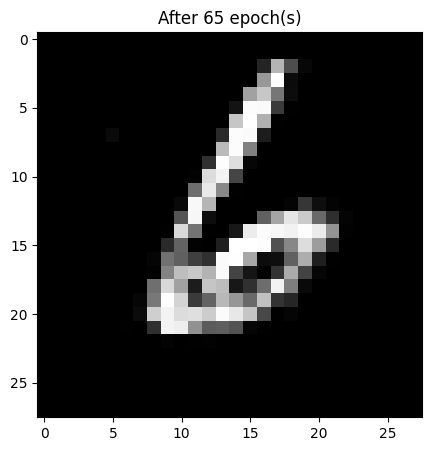

Epoch 66/100 => D_error: 1.2913861274719238, G_error: 0.910968542098999
Epoch 67/100 => D_error: 1.1761707067489624, G_error: 0.8731683492660522
Epoch 68/100 => D_error: 1.481121301651001, G_error: 0.8457053303718567
Epoch 69/100 => D_error: 1.354573130607605, G_error: 0.9195790886878967
Epoch 70/100 => D_error: 1.2698214054107666, G_error: 0.9070647358894348


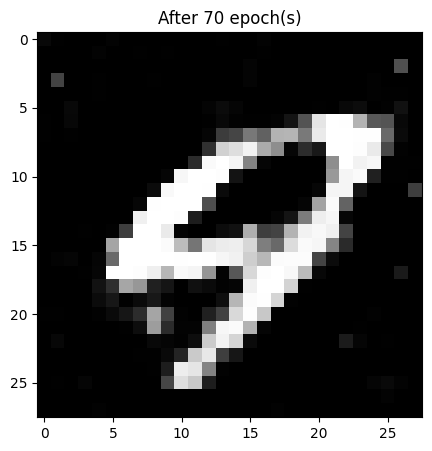

Epoch 71/100 => D_error: 1.248049259185791, G_error: 0.8663274645805359
Epoch 72/100 => D_error: 1.1769320964813232, G_error: 1.0235967636108398
Epoch 73/100 => D_error: 1.2528278827667236, G_error: 0.8131588101387024
Epoch 74/100 => D_error: 1.22763991355896, G_error: 0.8896971940994263
Epoch 75/100 => D_error: 1.4774285554885864, G_error: 0.7934763431549072


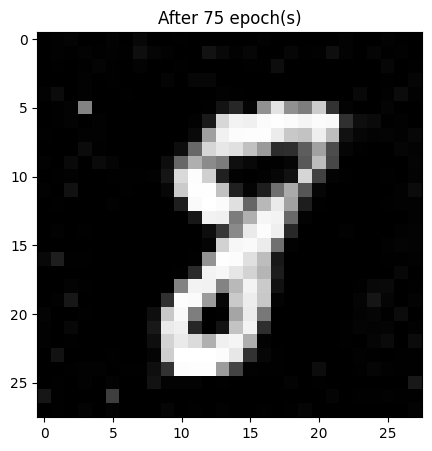

Epoch 76/100 => D_error: 1.400289535522461, G_error: 0.9032029509544373
Epoch 77/100 => D_error: 1.3765406608581543, G_error: 0.8829476237297058
Epoch 78/100 => D_error: 1.38826584815979, G_error: 0.9108476638793945
Epoch 79/100 => D_error: 1.400802731513977, G_error: 0.8869935274124146
Epoch 80/100 => D_error: 1.2102043628692627, G_error: 0.8186498880386353


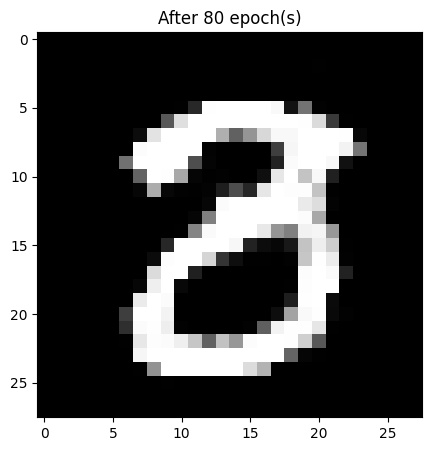

Epoch 81/100 => D_error: 1.364052176475525, G_error: 0.772240400314331
Epoch 82/100 => D_error: 1.2362421751022339, G_error: 0.9368155598640442
Epoch 83/100 => D_error: 1.2421860694885254, G_error: 0.9673052430152893
Epoch 84/100 => D_error: 1.226074457168579, G_error: 0.8685386180877686
Epoch 85/100 => D_error: 1.2983343601226807, G_error: 0.8140876293182373


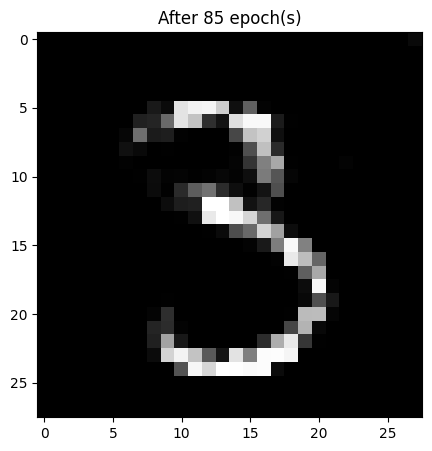

Epoch 86/100 => D_error: 1.1420708894729614, G_error: 0.8100438117980957
Epoch 87/100 => D_error: 1.3787662982940674, G_error: 1.0860201120376587
Epoch 88/100 => D_error: 1.3329339027404785, G_error: 0.6960493922233582
Epoch 89/100 => D_error: 1.212392807006836, G_error: 0.8774115443229675
Epoch 90/100 => D_error: 1.3353939056396484, G_error: 0.8888827562332153


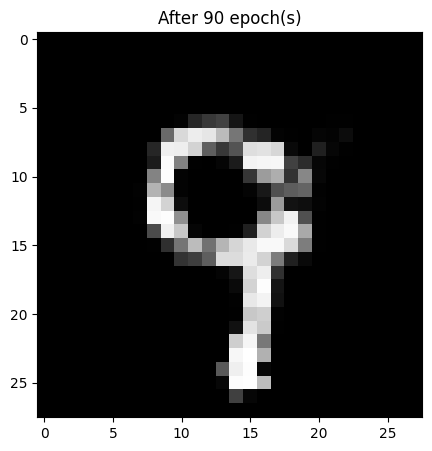

Epoch 91/100 => D_error: 1.2984304428100586, G_error: 0.948823869228363
Epoch 92/100 => D_error: 1.3684942722320557, G_error: 0.6480344533920288
Epoch 93/100 => D_error: 1.2300381660461426, G_error: 0.8934307098388672
Epoch 94/100 => D_error: 1.3896732330322266, G_error: 0.8809226751327515
Epoch 95/100 => D_error: 1.2876648902893066, G_error: 0.7879332304000854


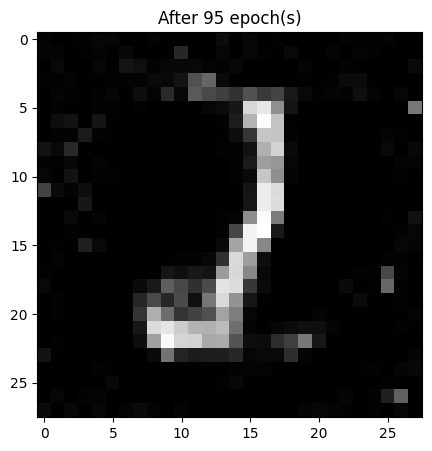

Epoch 96/100 => D_error: 1.3236985206604004, G_error: 0.7928979396820068
Epoch 97/100 => D_error: 1.4782774448394775, G_error: 0.6954675912857056
Epoch 98/100 => D_error: 1.2932524681091309, G_error: 0.7794546484947205
Epoch 99/100 => D_error: 1.3448525667190552, G_error: 0.8831217288970947
Epoch 100/100 => D_error: 1.1928741931915283, G_error: 0.9309332370758057


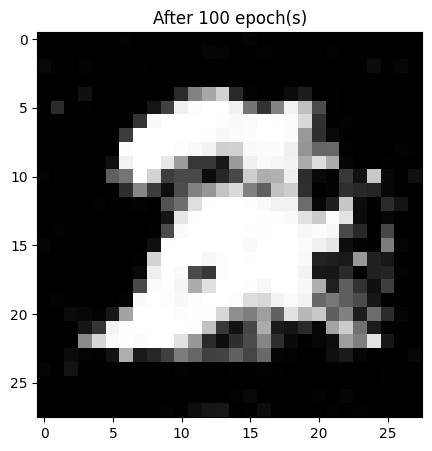

In [ ]:
num_epochs = 100

for epoch in range(num_epochs):
    for real_batch, _ in dataloader:
        real_data = real_batch.to(device)
        
        # Generate fake data
        fake_data = generator(noise(real_data.size(0))).detach()
        
        # Train discriminator
        d_error, d_pred_real, d_pred_fake = train_discriminator(d_optimizer, real_data, fake_data)
        
        # Generate fake data
        fake_data = generator(noise(real_batch.size(0)))
        
        # Train generator
        g_error = train_generator(g_optimizer, fake_data)

    print(f"Epoch {epoch+1}/{num_epochs} => D_error: {d_error}, G_error: {g_error}")

    # Visualize the generated image after each 5th epoch
    if (epoch+1) % 5 == 0:
        with torch.no_grad():
            fake_data = generator(noise(100)).detach().cpu()
            img = fake_data.view(100, 28, 28)
            plt.figure(figsize=(5,5))
            plt.imshow(img[0], cmap='gray')
            plt.title(f"After {epoch+1} epoch(s)")
            plt.show()

In [ ]:
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')


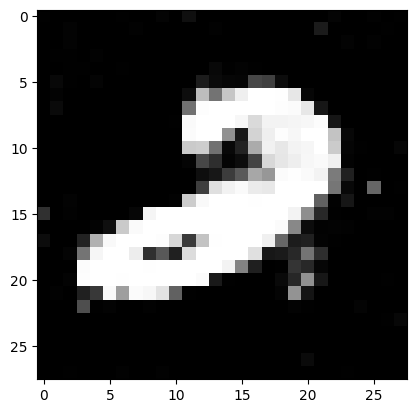

In [ ]:
with torch.no_grad():
    fake_data = generator(noise(100)).detach().cpu()
    img = fake_data.view(100, 28, 28)
    plt.imshow(img[0], cmap='gray')
    plt.show()
